<center>
<img src="./Images/logo_instance.png" />
<h1>Data Mining and Machine Learning</h1>
<h2><em>Master in Data Science</em></h2>
<br />
<h2>Lab session 4: Clustering in Python</h2>
</center>

## Example 1 - Self-coded K-means in NumPy

We start by generating some random points in three distinct clusters:

In [1]:
import numpy as np
np.random.seed(1)
X = np.vstack(((np.random.randn(30, 2) * 0.75 \
                            + np.array([2, 0])),
                  (np.random.randn(15, 2) * 0.25\
                           + np.array([-1.5, 0.5])),
                  (np.random.randn(30, 2) * 0.5 \
                           + np.array([-0.5, -1.5]))))

In [10]:
print(X[:2])

[[ 3.21825902 -0.45881731]
 [ 1.60387119 -0.80472647]]


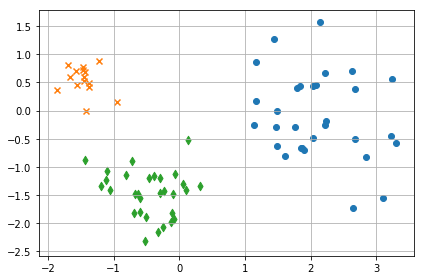

In [2]:
# Plot the points with different colors in the clusters
import matplotlib.pyplot as plt
plt.figure()
plt.grid()
plt.scatter(X[0:30, 0], X[0:30, 1], marker='o')
plt.scatter(X[30:45, 0], X[30:45, 1], marker='x')
plt.scatter(X[45:, 0], X[45:, 1], marker='d')

plt.box(on=True)
plt.tight_layout()
plt.show()

In [3]:
# Select randomly K centroids from the dataset
K = 3
idx = np.random.choice(X.shape[0], K, replace=False)
centroids = X[idx,:].copy()

In [4]:
# We define a simple function to plot the data
def plot_data(X, centroids):
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], \
                c='r', s=100)
    plt.box(on=True)
    plt.tight_layout()
    plt.show()

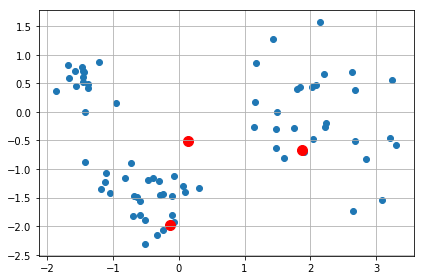

In [5]:
plot_data(X, centroids)

In [6]:
# E-step: assign points to the closest centroid
def e_step(X, centroids):
    distances = np.sqrt(((X - \
            centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [7]:
# M-step: find the most probable values for the centroids
def m_step(X, assignments, centroids):
    return np.array(\
        [X[assignments==k].mean(axis=0) \
         for k in range(centroids.shape[0])])

In [8]:
# Iterate several times to perform K-means clustering
for _ in range(30):
    assignments = e_step(X, centroids)
    centroids = m_step(X, assignments, centroids)

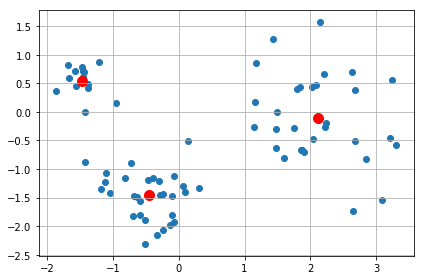

In [9]:
# Plot results
plot_data(X, centroids)

## Example 2 - Clustering in scikit-learn

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

In [10]:
from sklearn import cluster, datasets

# Run the K-Means clustering algorithm on a very simple dataset

# Load data
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Cluster using K-Means
np.random.seed(1)
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# We project to a 2D space using PCA and plot the results
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

In [12]:
# Get a colors matrix
import brewer2mpl
bmap = brewer2mpl.get_map('Set1', 'qualitative', 3)
colors = bmap.mpl_colors

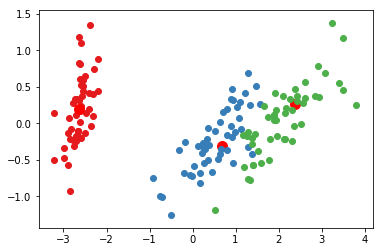

In [13]:
plt.figure()
centroids_pca = pca.transform(k_means.cluster_centers_)
for (i,centroid) in \
        zip(range(k_means.n_clusters), centroids_pca):
    plt.scatter(centroid[0], centroid[1], c='r', s=100)
    plt.scatter(X_pca[y_iris==i, 0], X_pca[y_iris==i, 1], color=colors[i])
plt.show()

In [14]:
# We cycle through K = 2, ..., 11 and compute one internal index and one external index
from sklearn import metrics
k_range = np.arange(10)
silhouette = np.zeros(10)
adj_rand = np.zeros(10)
for k in k_range:
    k_means = cluster.KMeans(n_clusters=k+2).fit(X_iris)
    silhouette[k] = \
        metrics.silhouette_score(X_iris, k_means.labels_, metric='euclidean')
    adj_rand[k] = \
        metrics.adjusted_rand_score(y_iris, k_means.labels_)

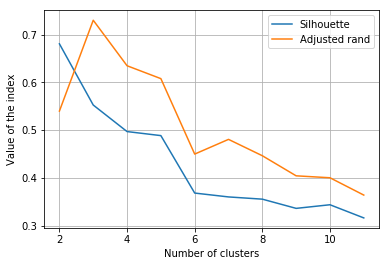

In [15]:
plt.figure()
plt.plot(k_range + 2, silhouette, label='Silhouette')
plt.plot(k_range + 2, adj_rand, label='Adjusted rand')
leg = plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Value of the index')
plt.grid()
plt.show()

## Example 3 - Real world dataset

We consider the list of proceedings from the NIPS conference:

https://archive.ics.uci.edu/ml/datasets/NIPS+Conference+Papers+1987-2015

Download the following file and load it by setting the correct path below:

https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv

In [16]:
# Load the dataset (only 1000 papers)
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/ISPAMM/Downloads/NIPS_1987-2015.csv', \
                   usecols=np.arange(1001))

In [17]:
# First column are words, the rest are the papers
words = data.values[:,0]
X = data.values[:, 1:]
X.shape

(11463, 1000)

In [18]:
# Find the average number of times a word appears
freq = X.mean(axis=1)

In [19]:
# Sort the frequencies and only keep 250 most frequent words
most_freq_idx = np.argsort(freq)[::-1][:250]
X = X[most_freq_idx, :].T
words = words[most_freq_idx]

In [20]:
# Preprocess
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(X)

C:\Users\ISPAMM\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
# Run K-means
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=10).fit(X)

In order to understand which words are used in each cluster, we run a LASSO algorithm, using as targets the labels from the clustering.

In [22]:
# Create target for LASSO
y_hot = preprocessing.OneHotEncoder\
    (n_values=10, sparse=False)\
    .fit_transform(kmeans.labels_.reshape(-1, 1))

In [23]:
# Train a LASSO to distinguish between class 1 and all others
from sklearn import linear_model, preprocessing
lasso = linear_model.Lasso(alpha=10**-3).fit(X, y_hot)

In [24]:
# Coefficients of first cluster
idx_first_cluster = lasso.coef_[0,:] > 10**-5
words[idx_first_cluster]

array(['using', 'system', 'models', 'recognition', 'probability', 'speech',
       'experiments', 'corresponding', 'word', 'continuous', 'independent'], dtype=object)

In [25]:
# Coefficients of second cluster
idx_first_cluster = lasso.coef_[1,:] > 10**-5
words[idx_first_cluster]

array(['using', 'weight', 'single', 'current', 'analog', 'circuit', 'chip'], dtype=object)

In [26]:
# Coefficients of fourth cluster
idx_first_cluster = lasso.coef_[3,:] > 10**-5
words[idx_first_cluster]

array(['network', 'learning', 'system', 'performance', 'control', 'second',
       'point', 'example', 'form', 'see', 'field', 'points', 'optimal',
       'generalization', 'term', 'theory', 'dynamics', 'node', 'within',
       'solution', 'corresponding', 'learn', 'position', 'terms',
       'standard', 'dynamic', 'energy', 'required', 'simulation',
       'connection'], dtype=object)